## Comparison between interhemispheric values

Draw comparison of the interhemispheric values captured both by the area of the corpus callosum and the fibers

Doing both correction and no correction, and observing them by center.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from statannotations.Annotator import Annotator
import itertools 

# ignore warnings for easier plotting
import warnings
warnings.filterwarnings("ignore")

from load_data import load_data

In [2]:
sns.set(style='darkgrid', context='talk', palette='Set1', font="serif")

In [3]:
# Hue colors order and names
# auxiliar dict to put correct order in the figure
map_hue_color = {
    "EDSS_group": ["EDSS<3", "EDSS>=3"],
    "SDMT_group": ["SDMT>=40", "SDMT<40"],
    "G_norm": ['G_z<=0', 'G_z>0'], 
    "Corr_norm": ['C_z<=0', 'C_z>0'],
    "disease": ["HC", "MS"],
    "GROUP": ["HC", "CIS", "RRMS", "SPMS", "PPMS"],
    "CENTER": ["CLINIC", "MAINZ", "MILAN", "NAPLES", "OSLO", "LONDON", "AMSTERDAM"],
    "groups" : ["HC", "EDSS<3", "EDSS>=3", "SDMT>=40", "SDMT<40"]
    # "GROUP": ["HC", "RRMS", "SPMS", "PPMS"]
}

# get the progressives together.
mapping_prog = {
    "HC": "HC",
    "CIS": "CIS", 
    "RRMS": "RRMS", 
    "SPMS": "PMS", 
    "PPMS": "PMS"
}

df_merged = load_data()

Initial length: 730
disease
HC    216
MS    514
dtype: int64
QC N: 5
QC Y: 724
LONDON2: 27


In [4]:
len(df_merged)

# print for each center, the interquartile range of EDSS. Do it in the format median (25% IQR, 75% IQR)
for center in df_merged.CENTER.unique():
    df_center = df_merged[df_merged.CENTER == center]
    print(center, df_center.EDSS.median(), "(", df_center.EDSS.quantile(0.25), df_center.EDSS.quantile(0.75), ")")

CLINIC 2.5 ( 1.5 3.875 )
MAINZ 1.5 ( 1.0 2.0 )
MILAN 3.75 ( 1.5 6.125 )
NAPLES 4.5 ( 2.5 6.0 )
OSLO 2.0 ( 1.5 2.875 )
LONDON 1.5 ( 1.0 2.0 )
AMSTERDAM 3.5 ( 2.5 5.5 )


## Compare interhemispheric values globally


Text(0, 0.5, 'CC volume')

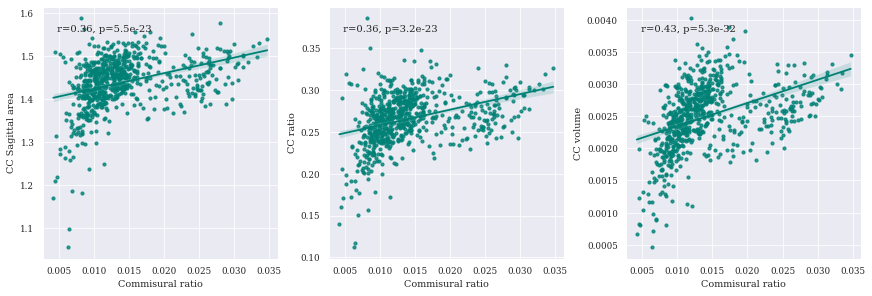

In [5]:
df_merged = pd.read_csv("/home/gerard/VHIR/MAGNIMS_DEFINITIVE_RESULTS/df_merged_combat.csv")

def annotate(col1, col2, data, multihue=False, **kwargs):
    if len(data[col1]) >= 2 or len(data[col2]) >= 2:
        r, p = stats.pearsonr(data[col1], data[col2])
        ax = plt.gca()

        # hardcoded, udpate if working with other labels
        x_pos = 0.05
        if multihue:
            label = kwargs["label"]
            dict_of_labels = {"CIS": 0, "RRMS": 1, "PMS": 2, 'MS':0, 'HC':1}
            y_pos = 0.9 - dict_of_labels[kwargs["label"]]*0.05
        else:
            label =  " "
            y_pos = 0.9
        
        ax.text(x_pos, y_pos, f'{label} ' + 'r={:.2f}, p={:.2g}'.format(r, p),
                transform=ax.transAxes)

def annotate_axis(col1, col2, data, ax, label, level=0):
    """
    Version of the annotator function but
    for 

    """
    r, p = stats.pearsonr(data[col1], data[col2])

    # hardcoded, udpate if working with other labels
    x_pos = 0.05 
    y_pos = 0.9 - level*0.05

    ax.text(x_pos, y_pos, f'{label} ' + 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)

# Inter vs Inter

# fer un subplot 2x1.
# i fer que cada un siguin les figures.
sns.set(style='darkgrid', context='paper', palette='turbo', font="serif")
f, axes = plt.subplots(1, 3, figsize=(12,4), constrained_layout=True)
axes = axes.ravel()

x1 = "Comm_ratio"
x2 = "CC_Sag_area_sqrt"

y1 = "Comm_ratio"
y2 = "CC_ratio_area"

z1 = "Comm_ratio"
z2 = "Comm_ratio_approx"

df_corrected = df_merged.copy()

for var in [x1,x2,y1,y2,z1,z2]:
    to_correct_for = 'AGE + C(SEX)'
    results = smf.ols(f'{x1} ~ {to_correct_for}', data=df_corrected).fit()
    df_corrected[f"{x1}"] = results.resid + results.params.Intercept


sns.regplot(x=x1, y=x2, data=df_corrected, marker='o', scatter_kws={'s':10}, color='#008176', ax=axes[0])
annotate_axis(x1, x2, df_corrected, axes[0], "", 0)

sns.regplot(x=y1, y=y2, data=df_corrected, marker='o', scatter_kws={'s':10},  color='#008176', ax=axes[1])
annotate_axis(y1, y2, df_corrected, axes[1], "", 0)

sns.regplot(x=z1, y=z2, data=df_corrected, marker='o', scatter_kws={'s':10},  color='#008176', ax=axes[2])
annotate_axis(z1, z2, df_corrected, axes[2], "", 0)

# Rename the axis of the figure
axes[0].set_xlabel("Commisural ratio")
axes[0].set_ylabel("CC Sagittal area")

axes[1].set_xlabel("Commisural ratio")
axes[1].set_ylabel("CC ratio")

axes[2].set_xlabel("Commisural ratio")
axes[2].set_ylabel("CC volume")

# plt.savefig("/home/gerard/Desktop/PROGRESS_NEURO/review/Fig2_Inter_relation.pdf", dpi=300)
# plt.savefig("/home/gerard/PAPERS/PAPER_COBRA/BRAIN_SUBMISSION/FIGURES/Fig2_Inter_relation.png", dpi=300)

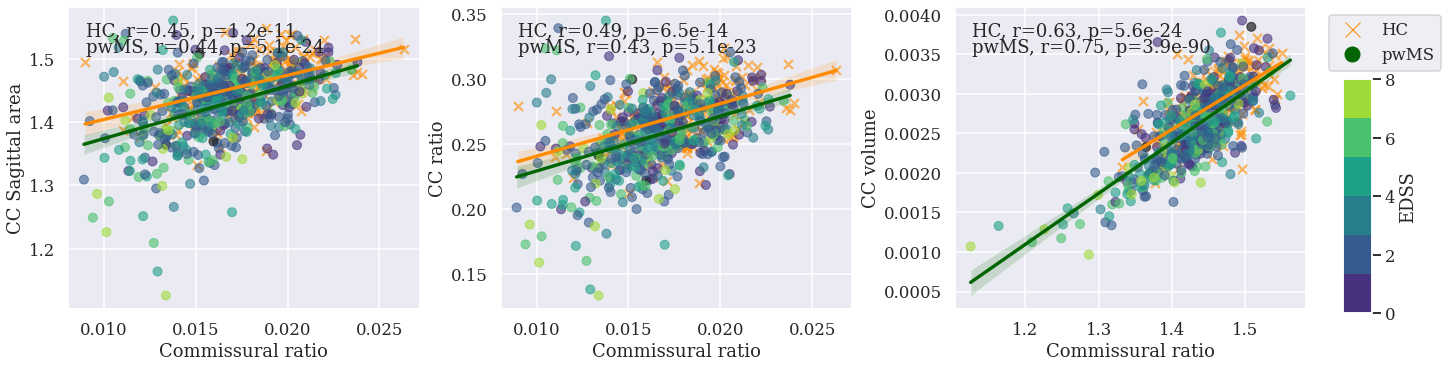

In [18]:
df_merged = pd.read_csv("/home/gerard/VHIR/MAGNIMS_DEFINITIVE_RESULTS/df_merged_combat.csv")

to_correct = "AGE + C(SEX)"
x1 = "Comm_ratio"
x2 = "CC_Sag_area_sqrt"

y1 = "CC_ratio_area"
y2 = "Comm_ratio_approx"

results = smf.ols(f"{x1} ~ {to_correct}", data=df_merged).fit()
df_merged[f"{x1}"] = results.resid + results.params.Intercept
results = smf.ols(f"{y1} ~ {to_correct}", data=df_merged).fit()
df_merged[f"{y1}"] = results.resid + results.params.Intercept
results = smf.ols(f"{x2} ~ {to_correct}", data=df_merged).fit()
df_merged[f"{x2}"] = results.resid + results.params.Intercept
results = smf.ols(f"{y2} ~ {to_correct}", data=df_merged).fit()
df_merged[f"{y2}"] = results.resid + results.params.Intercept

def bonferroni_correction(p_value, m, alpha=0.05):
    """
    Perform Bonferroni correction on a list of p-values.
    
    Parameters:
    - p_values: list or numpy array of p-values
    - alpha: significance level
    
    Returns:
    - corrected_p_values: list of Bonferroni corrected p-values
    - reject: boolean array indicating which null hypotheses are rejected
    """
    corrected_p_value = np.minimum(1, p_value * m)  # Ensure p-values don't exceed 1
    reject = corrected_p_value < alpha
    return corrected_p_value, reject


def annotate_axis(col1, col2, data, ax, label, level=0):
    """
    Version of the annotator function but
    for

    """
    r, p = stats.pearsonr(data[col1], data[col2])

    # Correct bonferroni p value with 
    n_comparisons = 6 + 8 # 6 from the second figure, 8 from the first
    p_corrected, reject = bonferroni_correction([p], n_comparisons)
    p = p_corrected[0]

    # hardcoded, udpate if working with other labels
    x_pos = 0.05
    y_pos = 0.9 - level * 0.05

    ax.text(
        x_pos,
        y_pos,
        f"{label}, " + "r={:.2f}, p={:.2g}".format(r, p),
        transform=ax.transAxes,
    )


from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("viridis"))

def create_subplot(x, y, ax, df, title, xlabel, ylabel, legend=True):
    ## Comm ratio - SPL
    # HC
    df_merged_hc = df[df.disease == "HC"]
    sns.regplot(
        x=x,
        y=y,
        data=df_merged_hc,
        scatter_kws={"alpha": 0.6},
        marker="x",
        color="darkorange",
        ax=ax,
    )

    # pwMS
    df_merged_pwms = df[df.disease != "HC"]

    EDSS_norm = (df_merged_pwms.EDSS - df_merged_pwms.EDSS.min()) / (
        df_merged_pwms.EDSS.max() - df_merged_pwms.EDSS.min()
    )
    df_merged_pwms_EDSS = [cmap(x) for x in EDSS_norm]
    color_array = np.array([*df_merged_pwms_EDSS])

    sns.regplot(
        x=x,
        y=y,
        data=df_merged_pwms,
        scatter_kws={"color": color_array, "alpha": 0.6},
        # scatter_kws={"alpha": 0.8},
        marker="o",
        color="darkgreen",
        ax=ax,
    )

    # annotate
    annotate_axis(x, y, df_merged_hc, ax, "HC", 0)
    annotate_axis(x, y, df_merged_pwms, ax, "pwMS", 1)

    # Title and axis
    # ax.set_title("Comm. ratio - SPL")
    # ax.set_xlabel("Commissural ratio")
    # ax.set_ylabel("Average SPL")
    from matplotlib.lines import Line2D

    handles = [
        Line2D(
            [0],
            [0],
            markerfacecolor="darkorange",
            color="darkorange",
            marker="x",
            lw=0,
            markersize=15,
        ),
        Line2D(
            [0],
            [0],
            marker="o",
            markerfacecolor="darkgreen",
            lw=0,
            color="darkgreen",
            markersize=15,
        ),
    ]
    if legend:
        ax.legend(
            handles=handles,
            labels=["HC", "pwMS"],
            bbox_to_anchor=(1.04, 1),
            loc="upper left",
        )


## Second version
# Don't use lmplot, its shite
# use subplot, and for each axis plot the things separately
sns.set(style="darkgrid", context="talk", palette="turbo", font="serif")
f, axes = plt.subplots(1, 3, figsize=(20, 5), constrained_layout=True)
axes = axes.ravel()

## Comm ratio - Average SPL
create_subplot(
    x1,
    x2,
    axes[0],
    df_merged,
    "Comm. ratio - CC Sag. area",
    "Commissural ratio",
    "CC Sagittal area",
    False,
)

## Comm ratio - Efficiency
create_subplot(
    x1,
    y1,
    axes[1],
    df_merged,
    "Comm. ratio - CC ratio",
    "Commissural ratio",
    "CC ratio",
    False,
)

## Comm ratio - Average SPL
create_subplot(
    x2,
    y2,
    axes[2],
    df_merged,
    "Comm. ratio - CC volume",
    "Commissural ratio",
    "CC volume",
    True,
)

## set the appropiate axis names

axes[0].set_xlabel("Commissural ratio")
axes[0].set_ylabel("CC Sagittal area")

axes[1].set_xlabel("Commissural ratio")
axes[1].set_ylabel("CC ratio")

axes[2].set_xlabel("Commissural ratio")
axes[2].set_ylabel("CC volume")

## LEGENDS
# Need to one one for colors and one for markers
# the one for colors needs to be a colorbar
f.subplots_adjust(right=0.8)
cbar_ax = f.add_axes([0.93, 0.14, 0.02, 0.65])

# and the other one just a classic legend
import matplotlib as mpl

plt.colorbar(
    mpl.cm.ScalarMappable(
        norm=mpl.colors.Normalize(
            vmin=df_merged.EDSS.min(), vmax=df_merged.EDSS.max()
        ),
        cmap=cmap,
    ),
    cax=cbar_ax,
    orientation="vertical",
    label="EDSS",
)

plt.savefig("/home/gerard/Desktop/PROGRESS_NEURO/review/Fig2_Inter_relation.pdf", dpi=300)
# plt.savefig("/home/gerard/PAPERS/PAPER_COBRA/BRAIN_SUBMISSION/FIGURES/Fig1_Figure_Intraiter.png", dpi=300)
# plt.savefig("/home/gerard/PAPERS/PAPER_COBRA/BRAIN_SUBMISSION/FIGURES/Fig1_Figure_Intraiter.tiff", dpi=300)

# plt.savefig("/home/gerard/PAPERS/PAPER_COBRA/FIGURES/Suppl_Figure_Intraiter_nocorr.pdf", dpi=300)

## Compare interhemispheric values per center


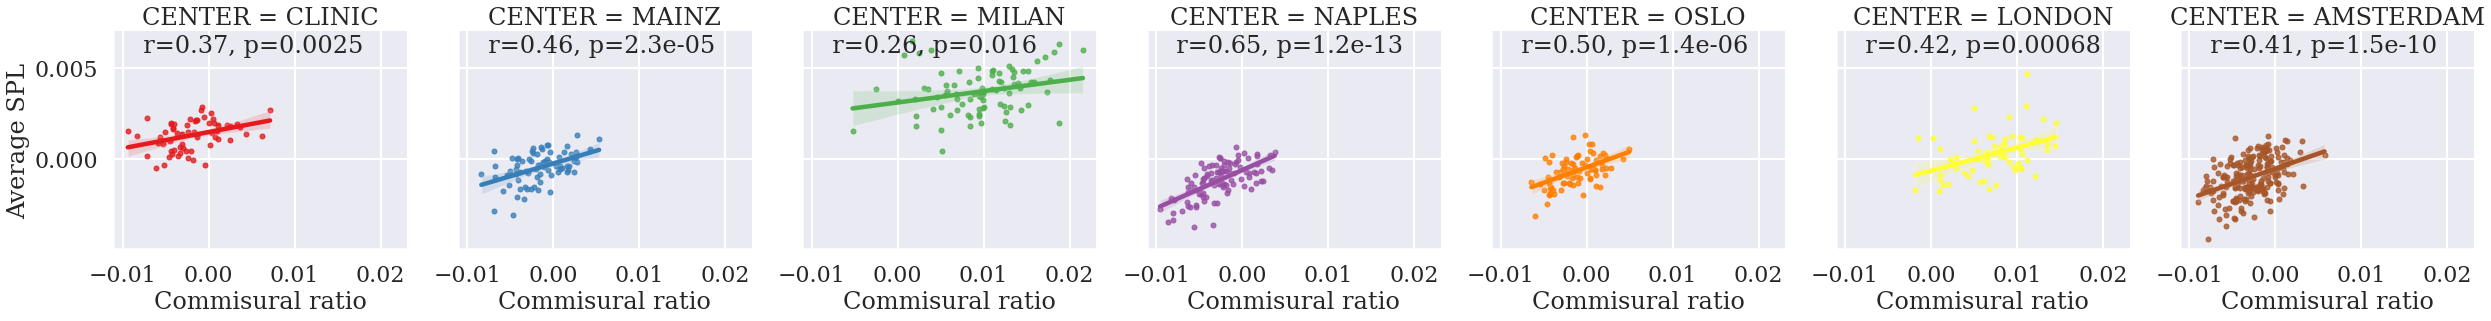

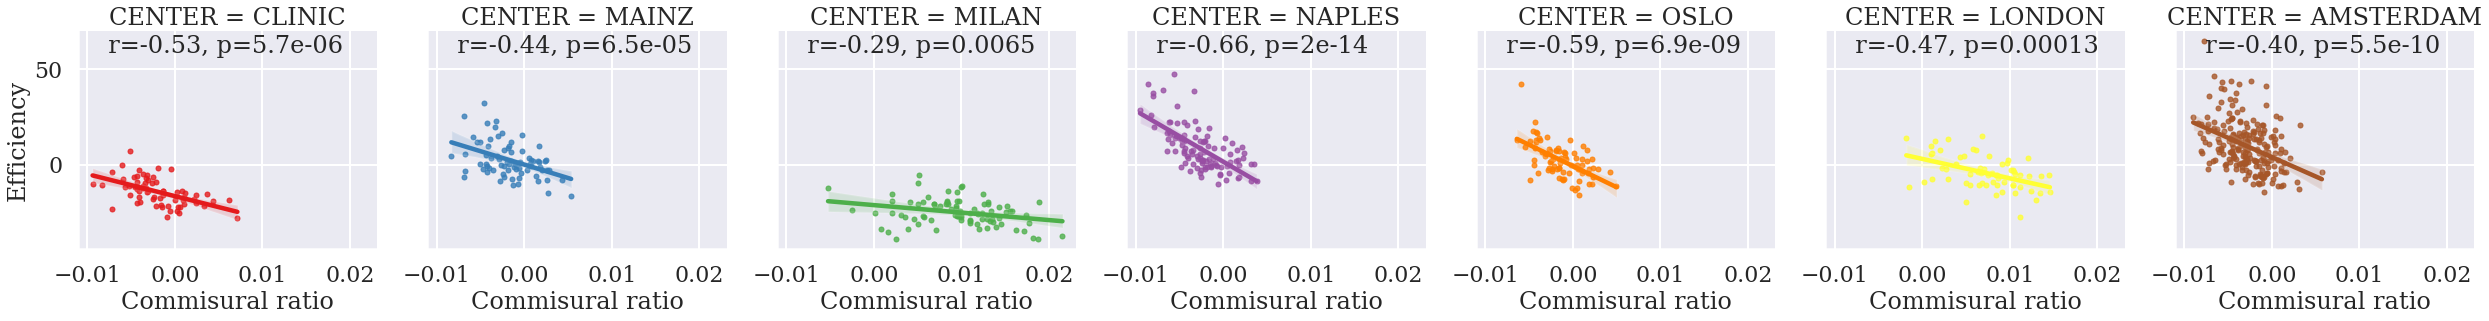

In [7]:
sns.set(style='darkgrid', context='poster', palette='Set1', font="serif")

x1 = "Comm_ratio"
x2 = "Comm_ratio"

y1 = "SC_spl_full"
y2 = "SC_eff_full"

df_corrected = df_merged.copy()

for var in [x1,y1,y2]:
    to_correct_for = 'AGE + C(SEX)'
    results = smf.ols(f'{var} ~ {to_correct_for}', data=df_corrected).fit()
    df_corrected[f"{var}"] = results.resid

#LMplot
## Do it per center?
q_list = [(x1, y1), (x2, y2)]
axis_labels = [("Commisural ratio", "Average SPL"), ("Commisural ratio", "Efficiency")]

for (q1, q2), (x_label, y_label) in zip(q_list, axis_labels):
    g = sns.lmplot(data=df_corrected, x=f"{q1}", y=f"{q2}", scatter_kws={'s':25}, col="CENTER", hue="CENTER", sharey=True, sharex=True)
    g.map_dataframe(annotate, f"{q1}", f"{q2}", multihue=False)
    g.set_axis_labels(x_label, y_label)

